In [ ]:
# Полиномиальная регрессионная модель;

# Лабораторная работа № 10-1 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.stats as ss
from typing import List, Callable
from matplotlib import pyplot as plot

In [ ]:
# Функция спрямления массива данных:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
# Выборки варианта 13:

X_k = np.array([[-0.223,0.275,0.46,0.015,0.717,-1.229,-1.29,-0.15,-1.814,-1.84],
       [2.082,1.752,-1.047,-0.316,0.457,-0.17,0.347,1.48,0.445,0.232],
       [-1.259,0.194,-0.976,0.372,0.299,-0.019,0.904,0.429,1.201,0.269],
       [1.89,0.848,0.607,-0.674,-0.711,-1.728,1.458,-1.422,-1.973,0.506],
       [0.159,-0.322,-0.121,-1.435,0.892,1.318,1.599,-0.734,-1.595,1.105],
       [0.39,-2.043,0.554,-1.756,-1.048,1.967,0.588,-0.026,-0.011,0.032],
       [0.687,0.377,-3.524,-1.789,1.533,0.933,-0.427,0.186,2.384,-1.3],
       [-1.566,2.326,-2.679,-2.226,-1.566,1.54,0.823,-3.05,0.766,-1.093],
       [-1.342,-0.574,-0.474,1.19,0.093,1.169,-1.482,-0.346,-1.534,-2.107],
       [0.259,0.169,-0.689,1.219,-0.798,1.757,0.917,-0.498,-1.041,-1.037]])

Y_k = np.array([[3.527,3.546,4.027,3.549,4.401,3.02,3.591,3.411,2.848,2.884],
       [5.069,4.361,3.261,3.589,4.033,3.56,3.951,4.287,4.067,3.534],
       [3.485,4.089,3.311,3.539,3.856,4.063,4.493,4.091,4.198,3.883],
       [4.598,3.93,3.902,3.235,3.795,3.154,4.691,3.247,2.943,3.983],
       [3.797,3.959,3.975,2.876,3.985,4.448,4.42,2.973,2.978,4.248],
       [3.55,2.708,3.946,3.248,3.439,4.504,4.364,3.878,3.767,3.702],
       [4.405,3.893,2.364,3.115,4.386,4.086,3.67,3.717,4.989,3.34],
       [3.14,4.83,2.746,3.349,3.228,4.16,4.293,2.629,3.67,3.296],
       [3.464,3.799,3.633,4.609,3.639,4.137,3.22,3.614,3.194,3.068],
       [3.754,3.484,3.522,4.232,3.575,4.137,3.981,3.543,3.198,3.24]])

data_x = np.array(flatten(X_k))
data_y = np.array(flatten(Y_k))

In [ ]:
# Составим матрицу значений, построенных на основе базисных функций (степенных):
def basic_values(power, data):
  F = []
  for factor in data:
    row = []
    for k in range(power + 1):
      row.append(factor ** k)
    F.append(row)

  # Матрица значений от матрицы базисных функций F:
  return (np.array(F), np.array(F).transpose())

# Оценка параметров полиномиальной регрессии [степени 5]:
def beta_values(F_data: List[List[float]], data_y: List[float]):
  return np.dot(np.dot(np.linalg.inv(np.dot(F_data[1], F_data[0])), F_data[1]), data_y)

# Оценка остаточной дисперсии:
def rv_estimation(data_x, data_y, beta_values, F):
  n, m = len(data_x), len(beta_values)
  product = np.array(data_y - np.dot(F, beta_values))
  return (1 / (n - m)) * np.dot(product.transpose(), product)

In [ ]:
# Набор аргументов:
x = np.linspace(min(data_x), max(data_x), 50)

# Модель полиномиальной регрессии:
def polinomical_reg(argument, beta_vector):
  sum_linear_comb = 0
  for index in range(1, len(beta_vector)):
    sum_linear_comb += beta_vector[index] * argument ** index
  return beta_vector[0] + sum_linear_comb

In [ ]:
# Формирование сета данных для полиномильной регрессии различных порядков:
polinomical_power = int(input("Введите предельное значение полинома: "))

# Для чётных степеней:
even_data, beta_one, even_rv_estimation_data = [], [],  []
even = list(range(2, polinomical_power + 1, 2))
for number in even:
  F_data = basic_values(number, data_x)
  beta_vector = beta_values(F_data, data_y)
  beta_one.append((number, beta_vector))
  even_data.append([polinomical_reg(arg, beta_vector) for arg in x])
  even_rv_estimation_data.append(rv_estimation(data_x, data_y, beta_vector, F_data[0]))

# Для нечётных степеней:
odd_data, beta_two, odd_rv_estimation_data = [], [], []
odd = list(range(1, polinomical_power + 1, 2))
for number in odd:
  F_data = basic_values(number, data_x)
  beta_vector = beta_values(F_data, data_y)
  beta_two.append((number, beta_vector))
  odd_data.append([polinomical_reg(arg, beta_vector) for arg in x])
  odd_rv_estimation_data.append(rv_estimation(data_x, data_y, beta_vector, F_data[0]))

even_rv, odd_rv = [], []
print("Оценка остаточной дисперсии для модели полиномиальной регрессии для выражения степени до n:\n")
for index in range(len(even_rv_estimation_data)):
  print(f"Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^{even[index]} --- {even_rv_estimation_data[index]:.5f}\nС.К.О. --- {even_rv_estimation_data[index] ** (1/2):.5f}\n")
  even_rv.append((round(even_rv_estimation_data[index] ** (1/2), 5), even[index]))
print('\n\n')
for index in range(len(odd_rv_estimation_data)):
  print(f"Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^{odd[index]} --- {odd_rv_estimation_data[index]:.5f}\nС.К.О. --- {odd_rv_estimation_data[index] ** (1/2):.5f}\n")
  odd_rv.append((round(odd_rv_estimation_data[index] ** (1/2), 5), odd[index]))

print(min(even_rv))
print(min(odd_rv))

Введите предельное значение полинома: 10
Оценка остаточной дисперсии для модели полиномиальной регрессии для выражения степени до n:

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^2 --- 0.04274
С.К.О. --- 0.20675

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^4 --- 0.04327
С.К.О. --- 0.20802

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^6 --- 0.04384
С.К.О. --- 0.20937

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^8 --- 0.04449
С.К.О. --- 0.21093

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^10 --- 0.04375
С.К.О. --- 0.20916




Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1 * x + ... + b_n * x^1 --- 0.04343
С.К.О. --- 0.20839

Оценка остаточной дисперсии для полиномиальной регрессии вида: y = b_0 + b_1

Text(0.5, 0.98, 'Аппроксимация полиномиальной регрессией вида: y = b_0 + b_1 * x + ... + b_n * x^n')

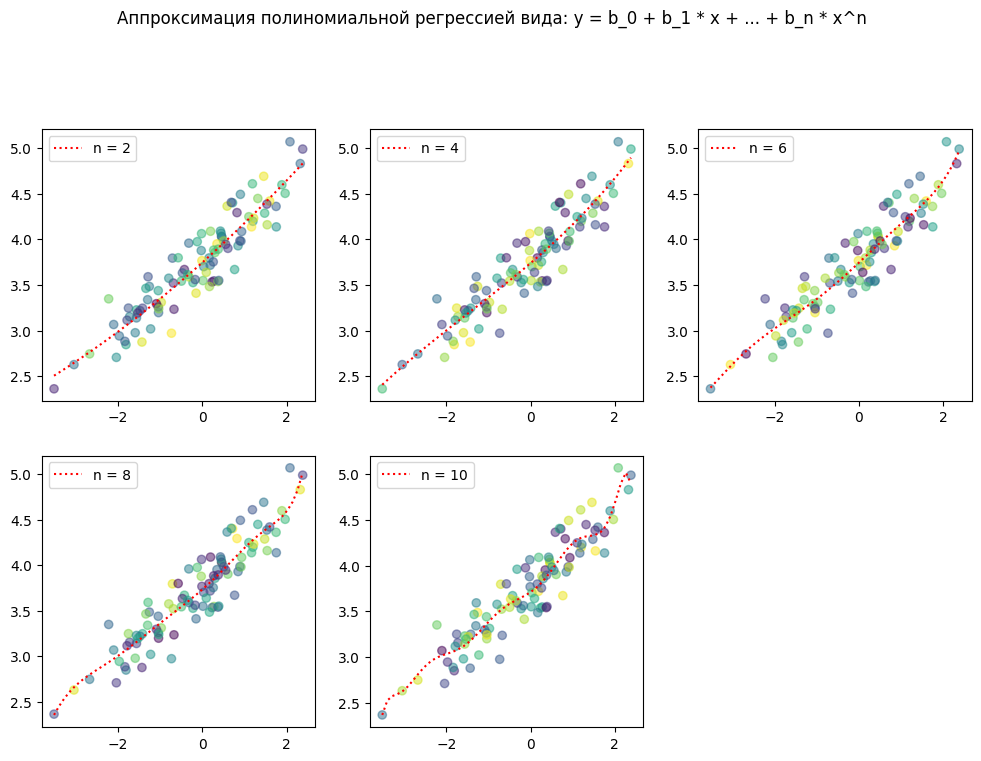

In [ ]:
# Набор аргументов:
# x = np.linspace(min(data_x), max(data_x), 37)

# Построение графика [чётные степени]:
plot.figure(figsize=(12, 12))
plot.grid()

for index in range(1, len(even_data) + 1):
  section = len(even_data) // 2 if len(even_data) % 2 == 0 else len(even_data) // 2 + 1
  plot.subplot(section, section, index)

  # График 1:
  colors = np.random.rand(len(data_x))
  plot.scatter(X_k, Y_k, c = colors, alpha = 0.5)

  # График 2:
  plot.plot(x, even_data[index - 1], color = 'red', linestyle = ':', label = f"n = {even[index - 1]}")

  plot.legend(loc='upper left')

plot.suptitle("Аппроксимация полиномиальной регрессией вида: y = b_0 + b_1 * x + ... + b_n * x^n")

Text(0.5, 0.98, 'Аппроксимация полиномиальной регрессией вида: y = b_0 + b_1 * x + ... + b_n * x^n')

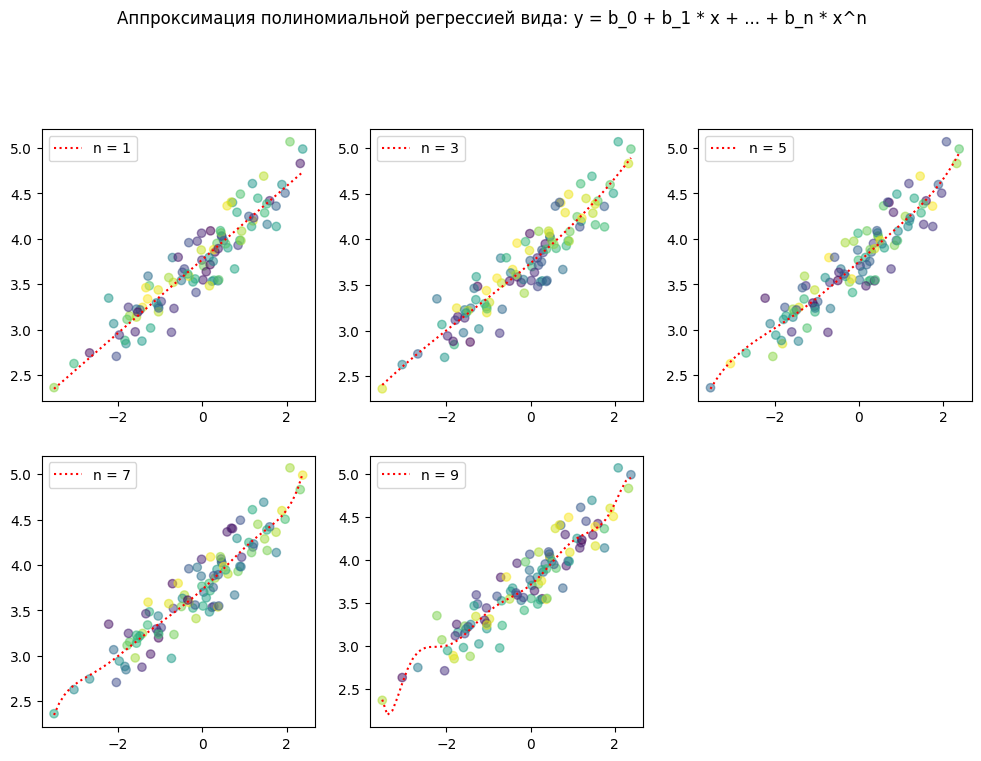

In [ ]:
# Набор аргументов:
# x = np.linspace(min(data_x), max(data_x), 37)

# Построение графика [нечётные степени]:
plot.figure(figsize=(12, 12))
plot.grid()

for index in range(1, len(odd_data) + 1):
  section = len(odd_data) // 2 if len(odd_data) % 2 == 0 else len(odd_data) // 2 + 1
  plot.subplot(section, section, index)

  # График 1:
  colors = np.random.rand(len(data_x))
  plot.scatter(X_k, Y_k, c = colors, alpha = 0.5)

  # График 2:
  plot.plot(x, odd_data[index - 1], color = 'red', linestyle = ':', label = f"n = {odd[index - 1]}")

  plot.legend(loc='upper left')

plot.suptitle("Аппроксимация полиномиальной регрессией вида: y = b_0 + b_1 * x + ... + b_n * x^n")

##